In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

latencies = pd.read_csv('latencies.csv', sep='\t', header=None,
            names=['exp', 'k', 'user', 'basket_size', 'latency'])

In [38]:
ks = [20, 50, 100, 200, 250, 300, 400, 500]

p90s = [np.percentile(latencies[latencies.k==k].latency, 90) for k in ks]
p50s = [np.percentile(latencies[latencies.k==k].latency, 50) for k in ks]

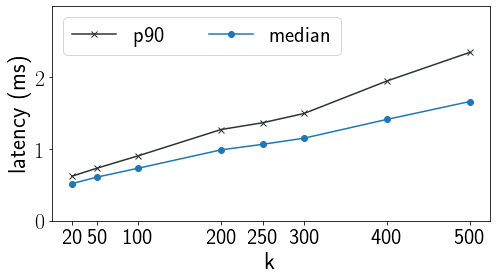

In [44]:
plt.plot(ks, p90s, marker='x', color='#2C3333')
plt.plot(ks, p50s, marker='o')

ax = plt.gca()

ax.set_xticks(ks, ks, fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='both', which='minor', labelsize=22)    
ax.set_xlabel('k', fontsize=24)
ax.set_ylabel('latency (ms)', fontsize=24)
plt.ylim((0, 2.99))
plt.legend(['p90', 'median'], fontsize=22, ncol=2, loc='upper left')

plt.gcf().set_size_inches(7, 4)
plt.tight_layout()
plt.gcf().savefig(f'/Users/ssc/nextcloud/papers/mozhdeh-within-basket/figures/inference.pdf', dpi=300)
plt.show() 

In [40]:
sizes = pd.read_csv('sizes.csv', sep='\t', header=None, names=['exp', 'user', 'k', 'history', 'cooc'])

In [41]:
for k in ks:
    print(k, '&', int(np.mean(sizes[sizes.k==k].history)), '&', int(np.mean(sizes[sizes.k==k].cooc)), '\\\\') 

20 & 915 & 28958 \\
50 & 1907 & 75012 \\
100 & 3173 & 153236 \\
200 & 5027 & 307630 \\
250 & 5789 & 384850 \\
300 & 6472 & 461338 \\
400 & 7668 & 612370 \\
500 & 8700 & 761671 \\


In [42]:
print(list(zip(ks, p90s)))

[(20, 0.6253719329833984), (50, 0.7359981536865234), (100, 0.9090900421142578), (200, 1.275253295898438), (250, 1.3692378997802739), (300, 1.4982223510742188), (400, 1.950693130493165), (500, 2.349376678466797)]


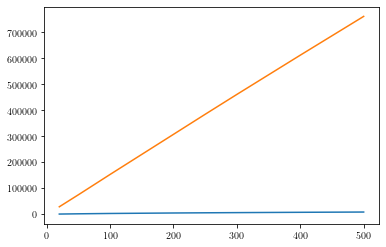

In [43]:
hs = [np.mean(sizes[sizes.k==k].history) for k in ks]
cs = [np.mean(sizes[sizes.k==k].cooc) for k in ks]
plt.plot(ks, hs)
plt.plot(ks, cs)